# Wine Quality Classification
## Final Project
### Amanda Killeen, Spring 2021
#### University of Colorado, Boulder - CSPB 3022: Intro to Data Science Algorithms 

## Problem & Motivation

They say to never judge a book by its cover, but I almost exclusively judge a wine by it’s label. When selecting a wine, if it’s just for me, I’ll go for something towards the bottom shelf (i.e. cheaper) with a cool looking label; if it’s for a special occasion, I’ll look towards the top shelves (i.e. pricier) and again, the label wins. 

A few years ago, I moved to Oregon wine country and since then, I have developed an interest in wine.  Given my label approach, I would like to become a bit more sophisticated in my tastes, so I am interested in what characteristics make-up a good quality or a poor quality wine? Which give notes of rich stone fruits or an oaky finish?  My project will use the Wine Data Set from UCI and classification techniques to determine which features impact and predict wine quality.

## Data Set Information

**UCI Machine Learning Repository, Wine Data Set**  
*P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.  
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

The dataset is based on Portuguese ‘Vinho Verde’ wine and there are CSV files available for both White and Red wine. 

The dataset is multivariate, contains **6497 rows**, and has **12 key attributes** divided into objective and subjective. I’ve bolded the attributes that based on my initial research I think could be the most interesting to investigate in relation to the classification of wine quality.


Objective, based on physicochemical properties:
1. **fixed acidity** - gives wine it’s sourness.  Waterhouse Labs, 2020.
2. **volatile acidity** - related to wine spoilage. Waterhouse Labs, 2020.
3. citric acid 
4. **residual sugar** - can be used to classify into dry, semi-dry, semi-sweet, sweet wines.  Lemieux, 2019.
5. chlorides 
6. free sulfur dioxide - naturally occurring preservative. Waterhouse Labs, 2020.
7. total sulfur dioxide - naturally occurring preservative. Waterhouse Labs, 2020.
8. density
9. **pH** - impacts the ‘softness’ of the wines taste and increasing PHs are favorable trend amongst wine writers. Nierman, 2004.
10. sulphates 
11. **alcohol**  

Subjective, the median of at least 3 evaluations conducted by wine experts:  
12. **quality** (score between 0 and 10)
    - 0 (very bad)
    - 10 (very excellent)

### Sources:
Lemieux, Pascale. “Everything There Is to Know about Residual Sugar in Wine.” *Alfred L'Expert En Vin*, 9 Apr. 2019,     
alfredsommelier.com/en/everything-there-is-to-know-about-residual-sugar-in-wine.

White, Noah Andrew. “Fixed Acidity.” *Waterhouse Lab*, 18 Mar. 2019, waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity#:~:text=Traditionally%20total%20acidity%20is%20divided,malic%2C%20citric%2C%20and%20succinic.&amp;text=Wines%20produced%20from%20cool%20climate,acidity%20and%20thus%20taste%20sour. 

“Whats in Wine?” Whats in Wine? | *Waterhouse Lab*, 9 Dec. 2020, waterhouse.ucdavis.edu/whats-in-wine. 

## Data Cleaning

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
%matplotlib inline

In [140]:
# create dataframes for each dataset
red = pd.read_csv('winequality-red.csv', sep = ';')
white = pd.read_csv('winequality-white.csv', sep = ';')

In [141]:
# add color attribute, so that the datasets can be identified when concatenated
red['color'] = 'red'
white['color'] = 'white'

In [142]:
# concatenate the two datasets into a single data set for ease of processing
df = pd.concat([red, white])

In [143]:
# add wine type dry, semi-dry, semi-sweet, sweet
df['type'] = np.where(df['residual sugar'].between(0.00, 16.99, inclusive=True), 'dry' \
    , np.where(df['residual sugar'].between(17.00, 34.99, inclusive=True), 'semi-dry' \
    , np.where(df['residual sugar'].between(35.00, 119.99, inclusive=True), 'semi-sweet' \
    , np.where(df['residual sugar'].ge(120.00), 'sweet', 'unknown'))))

In [144]:
# consolidate quality into generalized ratings
df['rating'] = np.where(df['quality'].between(0, 4, inclusive=True), 'poor' \
    , np.where(df['quality'].between(5, 7, inclusive=True), 'average' \
    , np.where(df['quality'].ge(8), 'excellent', 'unknown')))

In [145]:
# associate rating with numeric value for plotting
df['ratingType'] = np.where(df['quality'].between(0, 4, inclusive=True), 1 \
    , np.where(df['quality'].between(5, 7, inclusive=True), 2 \
    , np.where(df['quality'].ge(8), 3, 0))).astype('int32')

In [146]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,type,rating,ratingType
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,dry,average,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,dry,average,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,dry,average,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,dry,average,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,dry,average,2


In [147]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  type                  6497 non-null   object 
 14  rating                6497 non-null   object 
 15  ratingType           

In [148]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ratingType
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,1.992612
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.261333
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,2.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,2.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,2.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,3.000000


In [149]:
#check for null values, confirming the dataset description
byVal = df.isna().sum()
print(byVal)
print('Are there any null values? ', df.isnull().values.any()) 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
type                    0
rating                  0
ratingType              0
dtype: int64
Are there any null values?  False


## EDA

First, I wanted to see how wine quality was distributed amongst red and white wines. I looked at this two ways, first based on the quality ratings given by the evaluators, then based on a generalized 'Quality' value based on ranges of ratings.

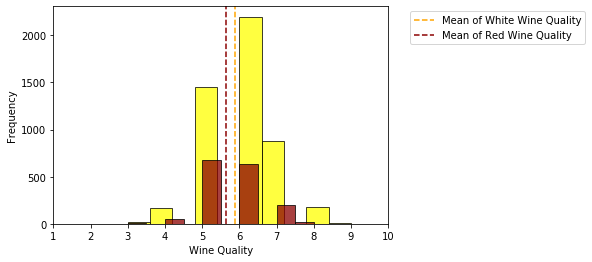

Mean of White Wine =  5.8779
Mean of Red Wine =  5.636
Mean of All Wine =  5.8184
Standard Deviation of White Wine =  0.8856385749678454
Standard Deviation of Red Wine =  0.8075694397347023
Standard Deviation of All Wine =  0.873255271531111
Median value of all wine quality =  6.0


In [150]:
#frequency of wine quality by color based on evaluator quality ratings
df.quality[df.color == 'white'].plot.hist(alpha = 0.75, bins = 10, color = 'yellow', edgecolor = 'black', label = '_nolegend')
df.quality[df.color == 'red'].plot.hist(alpha = 0.75, bins = 10, color = 'darkred', edgecolor = 'black', label = '_nolegend')
plt.xlabel('Wine Quality')
x = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10]
plt.xticks(x)
plt.axvline(df.quality[df.color == 'white'].mean(), ymin=0, ymax=1, linestyle = '--', color = 'orange', label = 'Mean of White Wine Quality')
plt.axvline(df.quality[df.color == 'red'].mean(), ymin=0, ymax=1, linestyle = '--', color = 'darkred',  label = 'Mean of Red Wine Quality')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
qualityWmean = round(df.quality[df.color == 'white'].mean(), 4)
qualityRmean = round(df.quality[df.color == 'red'].mean(), 4)
qualityAmean = round(df.quality.mean(), 4)
qualityAmedian = df.quality.median()
print('Mean of White Wine = ', qualityWmean)
print('Mean of Red Wine = ', qualityRmean )
print('Mean of All Wine = ', qualityAmean)
print('Standard Deviation of White Wine = ', df.quality[df.color == 'white'].std())
print('Standard Deviation of Red Wine = ', df.quality[df.color == 'red'].std())
print('Standard Deviation of All Wine = ', df.quality.std())
print('Median value of all wine quality = ', qualityAmedian)

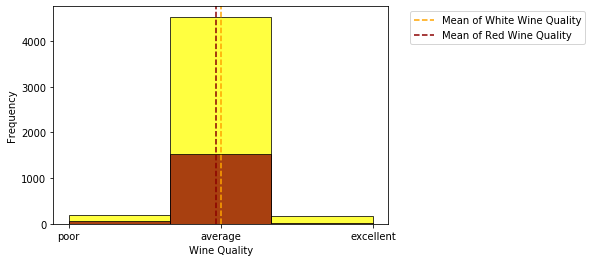

Mean of White Wine =  1.999387505104124
Mean of Red Wine =  1.9718574108818012
Standard Deviation of White Wine =  0.27226208203519947
Standard Deviation of Red Wine =  0.2233738111449794


In [151]:
#frequency of wine quality by color based on generalized quality ratings
df.ratingType[df.color == 'white'].plot.hist(alpha = 0.75, bins = 3, color = 'yellow', edgecolor = 'black', label = '_nolegend_')
df.ratingType[df.color == 'red'].plot.hist(alpha = 0.75, bins =3, color = 'darkred', edgecolor = 'black', label = '_nolegend_')
plt.xlabel('Wine Quality')
x = [1, 2, 3]
plt.xticks(x, ['poor', 'average', 'excellent'])
plt.axvline(df.ratingType[df.color == 'white'].mean(), ymin=0, ymax=1, linestyle = '--', color = 'orange', label = 'Mean of White Wine Quality')
plt.axvline(df.ratingType[df.color == 'red'].mean(), ymin=0, ymax=1, linestyle = '--', color = 'darkred',  label = 'Mean of Red Wine Quality')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
print('Mean of White Wine = ', df.ratingType[df.color == 'white'].mean())
print('Mean of Red Wine = ', df.ratingType[df.color == 'red'].mean())
print('Standard Deviation of White Wine = ', df.ratingType[df.color == 'white'].std())
print('Standard Deviation of Red Wine = ', df.ratingType[df.color == 'red'].std())

The bulk of the wines are clustered around the mean, the white wines have a higher mean quality in both cases than the red wines. I'm curious if this is an artifact of the differences in sizes of the red and white datasets. So I've attempted to look at this a different way, by using the empirical bootstrap method. Maybe this is a rabbit hole, but I am trying to explore if using the two different datasets (White and Red) will somehow have a negative impact on my final classifications and if I should use only the White Wine dataset. 

White Wine has bootstrapped mean 5.8804 compared to mean of White Dataset =  5.8779
Red Wine has mean 5.637 compared to mean of Red Dataset =  5.636
All Wine has mean 5.8173 compared to mean of All Dataset =  5.8184


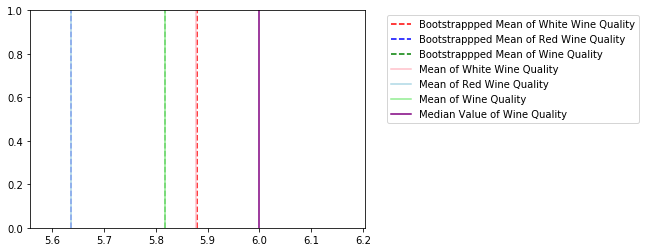

In [152]:
meansW = ([ np.mean( np.random.choice(df.quality[df.color == 'white'], 200)) for x in range(1000)])
bootW = round(np.mean(meansW),4)
print('White Wine has bootstrapped mean', bootW,  'compared to mean of White Dataset = ', qualityWmean)

meansR = ([ np.mean( np.random.choice(df.quality[df.color == 'red'], 200)) for x in range(1000)])
bootR= round(np.mean(meansR),4)
print('Red Wine has mean', bootR, 'compared to mean of Red Dataset = ', qualityRmean)

meansA = ([ np.mean( np.random.choice(df.quality, 200)) for x in range(1000)])
bootA= round(np.mean(meansA),4)
print('All Wine has mean', bootA, 'compared to mean of All Dataset = ', qualityAmean)

plt.axvline(bootW, ymin=0, ymax=1, linestyle = '--', color = 'red', label = 'Bootstrappped Mean of White Wine Quality')
plt.axvline(bootR, ymin=0, ymax=1, linestyle = '--', color = 'blue',  label = 'Bootstrappped Mean of Red Wine Quality')
plt.axvline(bootA, ymin=0, ymax=1, linestyle = '--', color = 'green',  label = 'Bootstrappped Mean of Wine Quality')
plt.axvline(qualityWmean, ymin=0, ymax=1, color = 'pink', label = 'Mean of White Wine Quality')
plt.axvline(qualityRmean, ymin=0, ymax=1, color = 'lightblue',  label = 'Mean of Red Wine Quality')
plt.axvline(qualityAmean, ymin=0, ymax=1, color = 'lightgreen',  label = 'Mean of Wine Quality')
plt.axvline(qualityAmedian, ymin=0, ymax=1, color = 'purple',  label = 'Median Value of Wine Quality')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

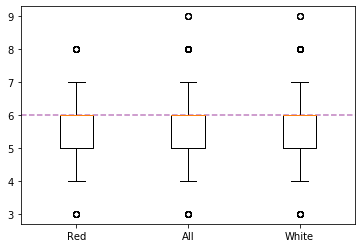

In [153]:
x = df.quality[df.color == 'red']
y = df.quality[df.color == 'white']
z = df.quality
plt.boxplot([x, z, y])
x = [1, 2, 3]
plt.xticks(x, ['Red', 'All', 'White'])
plt.axhline(z.median(), xmin=0, xmax=1, alpha = 0.5, linestyle = '--', color = 'purple')
plt.show()

Looking at the bootstrapped means compared to the dataset means have minimal differences, additionally, they all fall below the median quality value. Which then led me to create a boxplot, which shows that there are some outlier values in the white dataset, leading to the increased quality mean of white wines, but both datasets share the same median as the combined datasets, quality value = 6, therefore, I think I can safely use the combined datasets with this in mind.

After digging into the quality values, I explored if the 'flavor profile' defined by the residual sugar values were distributed against quality. The question I was seeking to answer here is if any personal preferences towards a particular flavor profile could influence the quality rating.

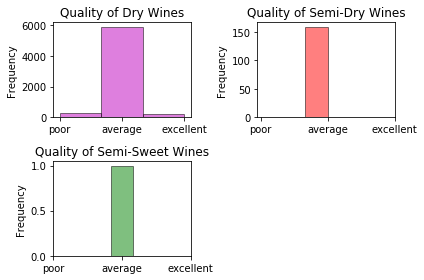

In [154]:
dryQ = df.ratingType[df.type == 'dry']
semiDryQ =df.ratingType[df.type == 'semi-dry']
semiSweetQ = df.ratingType[df.type == 'semi-sweet']
sweetQ = df.ratingType[df.type == 'sweet']

if dryQ.count() > 0:
    plt.subplot(2,2, 1)
    dryQ.plot.hist(alpha = 0.5, bins = 3, color = 'm', edgecolor = 'black')
    x = [1, 2, 3]
    plt.xticks(x, ['poor', 'average', 'excellent'])
    plt.title('Quality of Dry Wines')

if semiDryQ.count() > 0:
    plt.subplot(2, 2, 2)
    semiDryQ.plot.hist(alpha = 0.5, bins = 3, color = 'r', edgecolor = 'black')
    x = [1, 2, 3]
    plt.xticks(x, ['poor', 'average', 'excellent'])
    plt.title('Quality of Semi-Dry Wines')


if semiSweetQ.count() >0:
    plt.subplot(2, 2, 3)
    semiSweetQ.plot.hist(alpha = 0.5, bins = 3, color = 'g', edgecolor = 'black')  
    x = [1, 2, 3]
    plt.xticks(x, ['poor', 'average', 'excellent'])
    plt.title('Quality of Semi-Sweet Wines')


if sweetQ.count() > 0:
    plt.subplot(2, 2, 4)
    sweetQ.plot.hist(alpha = 0.5, bins = 3, color = 'b', edgecolor = 'black')
    x = [1, 2, 3]
    plt.xticks(x, ['poor', 'average', 'excellent'])
    plt.title('Quality of Sweet Wines')


plt.tight_layout()
plt.show()

Interestingly, there appeared to be no 'Sweet wines' in the datasets. I then explored how both color and type of wine impacted quality, returning to the generalized quality values:

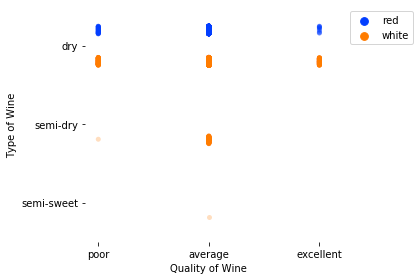

In [155]:
#compare quality of wine to type and break out by color 
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
sns.stripplot(x="ratingType", y="type", hue="color",
              data=df, dodge=True, alpha=.25, zorder=1, palette = 'bright')
x = [1, 2, 3]
plt.xticks(x, ['poor', 'average', 'excellent'])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.ylabel('Type of Wine')
plt.xlabel('Quality of Wine')
plt.show()

Finally, I did a correlation matrix to determine if any of the variables had a strong correlation. I was hoping to see more correlation between factors such as pH and residual sugar and quality, with the assumption that the expert ratings might be biased based on wine preferences, but that doesn't seem to be the case. However, one interesting observation was that there seems to be some correlation between percentage of alcohol and quality.

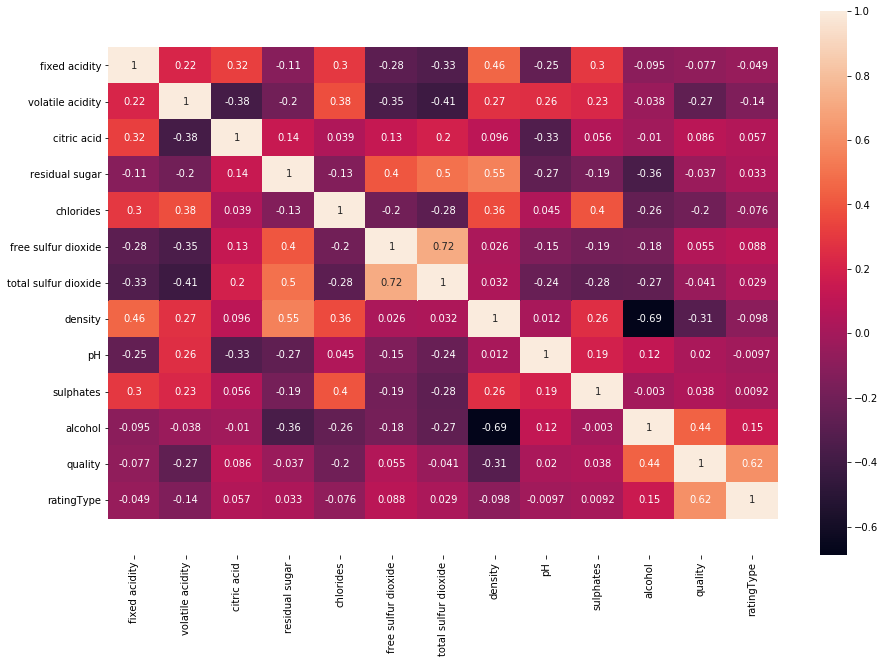

In [156]:
# Check correlations between variables
corr = df.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
plt.show()

In conclusion, the majority of the wines in the dataset have a rating of average and this does not seem to be affected by biased factors, such as type preference. Additionally, when looking at the raw quality values using several different methods, mean, boostrapped mean, and median, it showed that the majority of wines in the dataset fall in the middle or 'Average' range of quality, despite no strong correlations of characteristics as demonstrated in the correlation matrix. It will be interesting to see when classification models are applied the roles that the different characteristics play in the overall quality of the wine. 

## Model Approach

I will be applying classification techniques to determine which characteristics differentiate good quality wines from average and poor quality wines.  

The classification models I will be applying are Logisitic Regression, Decision Tree Classifier and Random Forest Classifier. I'm starting with a Logistic Regression as a basic model to act as a starting point for accuracy comparions to my other models.  Since Decision Tree and Random Forest are are related models, I am interested to see how they differ in accuracy, but also build upon each other. I have also selected these models, because the Random Forest model seems to work well with uncorrelated features and from the EDA, it it appears that the features aren't highly correlated. 

### Apply Models

#### Logistic Regression
The first model I'm going to apply is a Logistic Regression. Since a Logistic Regression requires a binary dependent variable, I'm going to create a binary attribute that is 0 for bad quality, 1 for good quality.  This basically takes my existing normalization to good, average, bad from my EDA and condenses it more.

In [157]:
import sklearn as sk
from sklearn import model_selection, linear_model

# Create my binary variable for classification, 1 for good, 0 for bad
df['goodQuality'] = [1 if x >= 7 else 0 for x in df['quality']]

# Remove my quality related fields from my features list
X = df.drop(['quality','goodQuality', 'rating', 'ratingType', 'type', 'color'], axis = 1)
y = df['goodQuality']

In [158]:
# Create test and training datasets and variables
accuracy = []
models = ['Logistic Regression']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=.25, random_state=0)
logReg = sk.linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model = logReg.fit(X_train, y_train)
y_pred = model.predict(X_test)
scoreLR = round(model.score(X_test,y_test) * 100, 2)
print('Score is', scoreLR,'% accuracy')
accuracy.append(scoreLR)

Score is 81.23 % accuracy


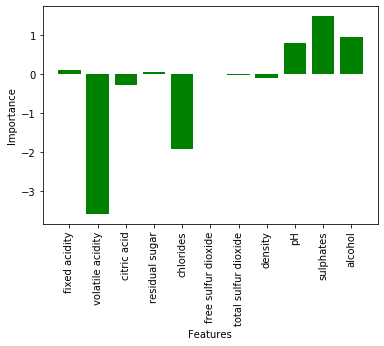

In [159]:
# get features and importance to see which factors have the greatest impact. Using coefficent to determine importance.
features = np.array(X.columns)
importance = model.coef_.flatten()
plt.bar(features, importance, color = 'green')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

The Logistic Regression model is definitely leaving something to be desired, but is a good starting point for modeling. Aside from the lower accuracy, several features were identified as leading factors, but the correlation matrix from my EDA tells a slightly different story. I was expecting to see alcohol having a higher importance.

#### Decision Tree Classifier

Hoping to improve my model accuracy, I am trying Decision Tree Classifier.  Decision Tree Classifiers can handle both continious and categorical data, but I only have continious in this dataset. I've also read that outliers too have little effect on them and I did identify some outliers in my my EDA.

In [160]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion = 'entropy', random_state=0, splitter = 'best')
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
scoreDT = round(model1.score(X_test,y_test) * 100, 2)
print('Score is', scoreDT,'% accuracy')
accuracy.append(scoreDT)
models.append('Decision Tree')

Score is 83.63 % accuracy


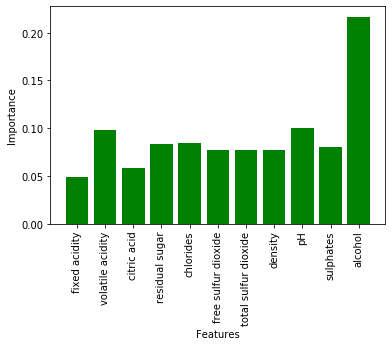

In [161]:
importance = model1.feature_importances_
features = np.array(X.columns)
plt.bar(features, importance, color = 'green')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

The accuracy is improved on this model as compared to Logistic Regression. I was also able to improve accuracy slightly by setting the criterion to 'entropy', to split based on information gain, instead of the default 'gini'. The Decision Tree model also did a better job of flagging alcohol as an important feature, which is more inline with my expectations.

#### Random Forest Classifier
Building upon the Decision Tree Classifier, I've also implemented the Random Forest Classifier. Since the Random Forest model seems to work well with uncorrelated features and from the EDA, it it appears that the features aren't highly correlated. 

In [162]:
# create model
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=0, n_estimators = 500)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
scoreRF = round(model2.score(X_test,y_test) * 100, 2)
print('Score is', scoreRF,'% accuracy')
accuracy.append(scoreRF)
models.append('Random Forest')

Score is 88.55 % accuracy


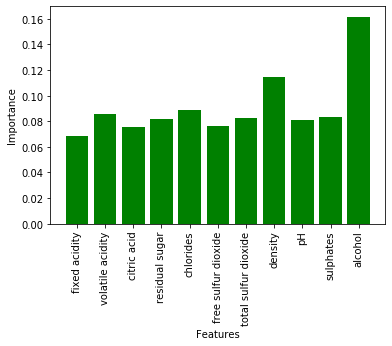

In [163]:
#graph features importance
importance = model2.feature_importances_
features = np.array(X.columns)
plt.bar(features, importance, color = 'green')
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Random Forest provided the best accuracy and was consistent with Decision Tree in that they both flagged Alcohol as having the highest importance. I was also able to improve my accuracy slightly by adjusting the n_estimators value to 500.

## Conclusion

In [164]:
#create table of models compared to their accuracy
acMo = zip(models, accuracy)
accuTable = pd.DataFrame(acMo, columns = ['Classification Model', 'Score'])
accuTable

,Classification Model,Score
0,Logistic Regression,81.23
1,Decision Tree,83.63
2,Random Forest,88.55


Based on the scores of the 3 models, Random Forest has the highest accuracy. Across all 3 models, Alcohol stood out as an important feature and that appeared to be honed as the models progressed. The importance of alcohol as a predictor of wine quality also fits nicely in a logistic regression plot. Which is interesting because the other 2 features identified in the Logistic Regression did not have a good fit, they were almost linear.

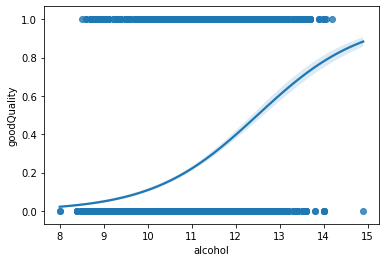

In [165]:
sns.regplot(x='alcohol', y='goodQuality', data=df, logistic=True)
plt.show()

##### Sulphates & pH Logistic Regression Plots

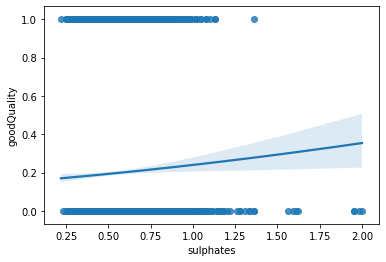

In [166]:
sns.regplot(x='sulphates', y='goodQuality', data=df, logistic=True)
plt.show()

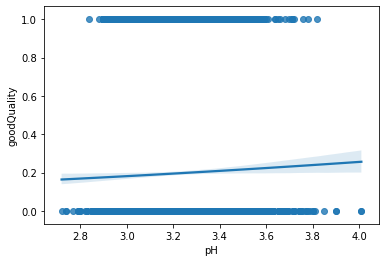

In [167]:
sns.regplot(x='pH', y='goodQuality', data=df, logistic=True)
plt.show()

I think all of my models worked well and I was able to see improvements based on moving-up to more complex models. Some improvements I would make would be possibly narrowing my focus to more specific features and also investigating ways to normalize the features against eachother, in the event their different methods of measurement had an impact on each other. For example did Alcohol stand out because of how it is measure? I would also be interested in trying a K-Nearest Neighbors, to see if a different number of classes changed the results. Overall I enoyed this project and I hope you enjoyed it too. Cheers!